In [1]:
#-----------------------------------------------------------------------------------------------------------------
"IMPORT LIBRARIES"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [2]:
 #-----------------------------------------------------------------------------------------------------------------
"DATASET LOADING"

df = pd.read_excel("2012.xlsx")

df['Date'] = pd.to_datetime(df['Date'])

model_work = "RF"
###Replacing the Missing Values

df['UKIP'].fillna(int(df['UKIP'].mean()), inplace=True)
df['Green'].fillna(int(df['Green'].mean()), inplace=True)
df['BNP'].fillna(int(df['BNP'].mean()), inplace=True)
df['CON'].fillna(int(df['CON'].mean()), inplace=True)
df['Labour'].fillna(int(df['Labour'].mean()), inplace=True)
df['Lib Dem'].fillna(int(df['Lib Dem'].mean()), inplace=True)


# df = df.sort_values(by='Date',ascending=True)

df.set_index("Date", inplace=True)



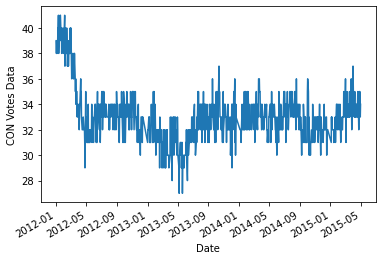

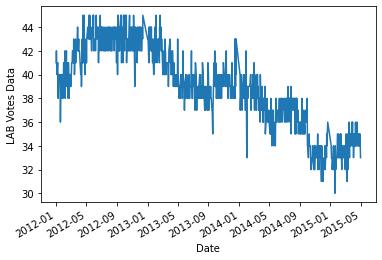

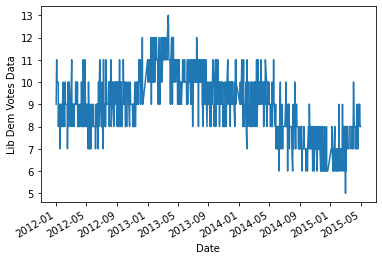

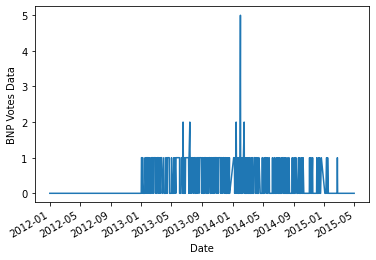

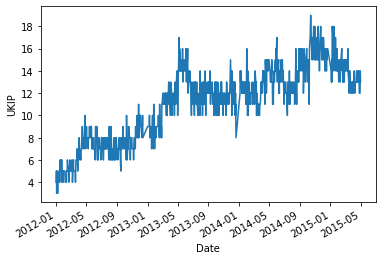

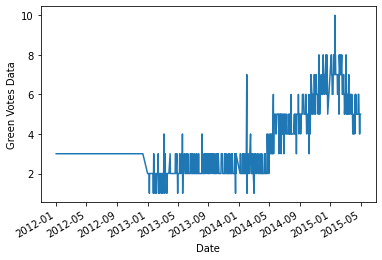

In [3]:
"EDA (Exploratory Data Analysis)"

df['CON'].plot()
plt.ylabel("CON Votes Data")
plt.show()

df['Labour'].plot()
plt.ylabel("LAB Votes Data")
plt.show()

df['Lib Dem'].plot()
plt.ylabel("Lib Dem Votes Data")
plt.show()

df['BNP'].plot()
plt.ylabel("BNP Votes Data")
plt.show()

df['UKIP'].plot()
plt.ylabel("UKIP")
plt.show()

df['Green'].plot()
plt.ylabel("Green Votes Data")
plt.show()

Mean Absolute Error CON: 0.0
Mean Squared Error CON: 0.0
Root Mean Squared Error CON: 0.0
(R^2) Score CON: 1.0
Accuracy CON: CON    100.0
dtype: float64



<ipython-input-4-4f1324869e36>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(df_Z_train, df_Z_train)


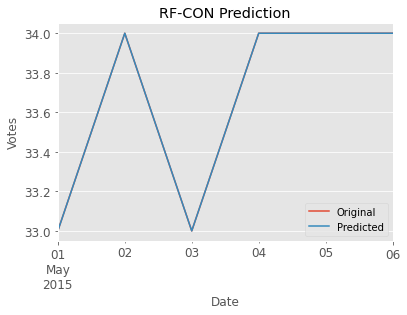

In [4]:
"PREDICTION FOR ONE WEEK"

"One Week Prediction"
# Slice the Data
From = '2012-01-02'
To   = '2015-04-30'
df_Z_train = df.loc[From:To,:]

# Slice the Data
df_test = pd.read_excel("2012_test.xlsx")

df_test['Date'] = pd.to_datetime(df_test['Date'])

df_test.set_index("Date", inplace=True)

df_Z_test = df_test.select_dtypes(exclude=['object', 'datetime']) * 100

#--------------------------------  CON   ------------------------------------------------------------------------------------
"MODEL PREDICTION"

party = "CON"

df_Z_train = df_Z_train[[party]]
df_Z_test = df_Z_test[[party]]


regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(df_Z_train, df_Z_train)  

y_preds = regressor.predict(df_Z_test)

#-----------------------------------------------------------------------------------------------------------------
"PERFORMANCE METRICS"

print(f"Mean Absolute Error {party}:", round(metrics.mean_absolute_error(df_Z_test, y_preds), 4))
print(f"Mean Squared Error {party}:", round(metrics.mean_squared_error(df_Z_test, y_preds), 4))
print(f"Root Mean Squared Error {party}:", round(np.sqrt(metrics.mean_squared_error(df_Z_test, y_preds)), 4))
print(f"(R^2) Score {party}:", round(metrics.r2_score(df_Z_test, y_preds), 4))

errors = abs(df_Z_test.values.reshape(-1,1)- y_preds.reshape(-1,1))
mape = 100 * (errors / df_Z_test)
accuracy = 100 - np.mean(mape)
print(f'Accuracy {party}:', round(accuracy, 2)) 
print()

#-----------------------------------------------------------------------------------------------------------------
"PREDICTION PLOT"

x = df_Z_test[party].values
y = y_preds
dfedf = pd.DataFrame({'Original':x, 'Predicted':y , "Date":df_Z_test.index.values})
dfedf.set_index("Date", inplace=True)
plt.style.use('ggplot')
ax = dfedf[['Original','Predicted']].plot(kind='line', title =f"{model_work}-{party} Prediction",legend=True, fontsize=12)
ax.set_xlabel("Date",fontsize=12)
ax.set_ylabel("Votes",fontsize=12)
plt.show()

<ipython-input-5-b5678eae37eb>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(df_Z_train, df_Z_train)


Mean Absolute Error Labour: 0.0
Mean Squared Error Labour: 0.0
Root Mean Squared Error Labour: 0.0
(R^2) Score Labour: 1.0
Accuracy Labour: Labour    100.0
dtype: float64



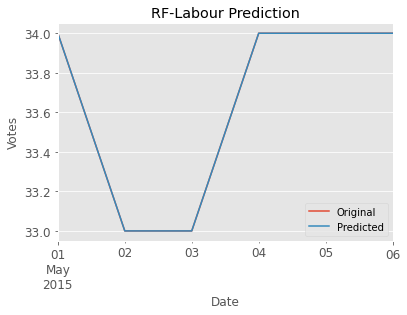

In [5]:
"MODEL PREDICTION"



"One Week Prediction"
# Slice the Data
From = '2012-01-02'
To   = '2015-04-30'
df_Z_train = df.loc[From:To,:]

# Slice the Data
df_test = pd.read_excel("2012_test.xlsx")

df_test['Date'] = pd.to_datetime(df_test['Date'])

df_test.set_index("Date", inplace=True)

df_Z_test = df_test.select_dtypes(exclude=['object', 'datetime']) * 100


party = "Labour"

df_Z_train = df_Z_train[[party]]
df_Z_test = df_Z_test[[party]]


regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(df_Z_train, df_Z_train)  

y_preds = regressor.predict(df_Z_test)

#-----------------------------------------------------------------------------------------------------------------
"PERFORMANCE METRICS"

print(f"Mean Absolute Error {party}:", round(metrics.mean_absolute_error(df_Z_test, y_preds), 4))
print(f"Mean Squared Error {party}:", round(metrics.mean_squared_error(df_Z_test, y_preds), 4))
print(f"Root Mean Squared Error {party}:", round(np.sqrt(metrics.mean_squared_error(df_Z_test, y_preds)), 4))
print(f"(R^2) Score {party}:", round(metrics.r2_score(df_Z_test, y_preds), 4))
errors = abs(df_Z_test.values.reshape(-1,1)- y_preds.reshape(-1,1))
mape = 100 * (errors / df_Z_test)
accuracy = 100 - np.mean(mape)
print(f'Accuracy {party}:', round(accuracy, 2)) 
print()

#-----------------------------------------------------------------------------------------------------------------
"PREDICTION PLOT"

dataset_kk = pd.DataFrame({'y_test': [df_Z_test[party].values.reshape(-1,1)], 'y_preds': [y_preds.reshape(-1,1)]})


x = df_Z_test[party].values
y = y_preds
dfedf = pd.DataFrame({'Original':x, 'Predicted':y , "Date":df_Z_test.index.values})
dfedf.set_index("Date", inplace=True)
plt.style.use('ggplot')
ax = dfedf[['Original','Predicted']].plot(kind='line', title =f"{model_work}-{party} Prediction",legend=True, fontsize=12)
ax.set_xlabel("Date",fontsize=12)
ax.set_ylabel("Votes",fontsize=12)
plt.show()



<ipython-input-6-4cd841e698b9>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(df_Z_train, df_Z_train)


Mean Absolute Error Lib Dem: 0.0
Mean Squared Error Lib Dem: 0.0
Root Mean Squared Error Lib Dem: 0.0
(R^2) Score Lib Dem: 1.0
Accuracy Lib Dem: Lib Dem    100.0
dtype: float64



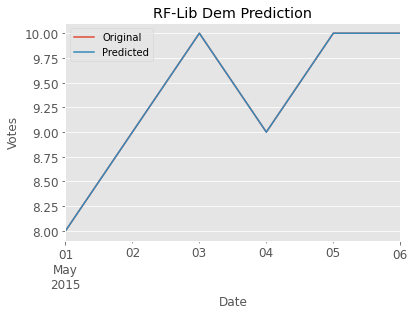

In [6]:
"MODEL PREDICTION"


"One Week Prediction"
# Slice the Data
From = '2012-01-02'
To   = '2015-04-30'
df_Z_train = df.loc[From:To,:]

# Slice the Data
df_test = pd.read_excel("2012_test.xlsx")

df_test['Date'] = pd.to_datetime(df_test['Date'])

df_test.set_index("Date", inplace=True)

df_Z_test = df_test.select_dtypes(exclude=['object', 'datetime']) * 100

party = "Lib Dem"

df_Z_train = df_Z_train[[party]]
df_Z_test = df_Z_test[[party]]


regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(df_Z_train, df_Z_train)  

y_preds = regressor.predict(df_Z_test)

#-----------------------------------------------------------------------------------------------------------------
"PERFORMANCE METRICS"

print(f"Mean Absolute Error {party}:", round(metrics.mean_absolute_error(df_Z_test, y_preds), 4))
print(f"Mean Squared Error {party}:", round(metrics.mean_squared_error(df_Z_test, y_preds), 4))
print(f"Root Mean Squared Error {party}:", round(np.sqrt(metrics.mean_squared_error(df_Z_test, y_preds)), 4))
print(f"(R^2) Score {party}:", round(metrics.r2_score(df_Z_test, y_preds), 4))
errors = abs(df_Z_test.values.reshape(-1,1)- y_preds.reshape(-1,1))
mape = 100 * (errors / df_Z_test)
accuracy = 100 - np.mean(mape)
print(f'Accuracy {party}:', round(accuracy, 2)) 
print()
#-----------------------------------------------------------------------------------------------------------------
"PREDICTION PLOT"

dataset_kk = pd.DataFrame({'y_test': [df_Z_test[party].values.reshape(-1,1)], 'y_preds': [y_preds.reshape(-1,1)]})


x = df_Z_test[party].values
y = y_preds
dfedf = pd.DataFrame({'Original':x, 'Predicted':y , "Date":df_Z_test.index.values})
dfedf.set_index("Date", inplace=True)
plt.style.use('ggplot')
ax = dfedf[['Original','Predicted']].plot(kind='line', title =f"{model_work}-{party} Prediction",legend=True, fontsize=12)
ax.set_xlabel("Date",fontsize=12)
ax.set_ylabel("Votes",fontsize=12)
plt.show()



<ipython-input-7-872b41982ab5>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(df_Z_train, df_Z_train)


Mean Absolute Error UKIP: 0.0
Mean Squared Error UKIP: 0.0
Root Mean Squared Error UKIP: 0.0
(R^2) Score UKIP: 1.0
Accuracy UKIP: UKIP    100.0
dtype: float64



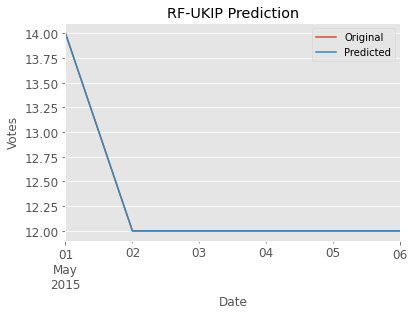

In [7]:
"MODEL PREDICTION"


"One Week Prediction"
# Slice the Data
From = '2012-01-02'
To   = '2015-04-30'
df_Z_train = df.loc[From:To,:]

# Slice the Data
df_test = pd.read_excel("2012_test.xlsx")

df_test['Date'] = pd.to_datetime(df_test['Date'])

df_test.set_index("Date", inplace=True)

df_Z_test = df_test.select_dtypes(exclude=['object', 'datetime']) * 100

party = "UKIP"

df_Z_train = df_Z_train[[party]]
df_Z_test = df_Z_test[[party]]


regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(df_Z_train, df_Z_train)  

y_preds = regressor.predict(df_Z_test)

#-----------------------------------------------------------------------------------------------------------------
"PERFORMANCE METRICS"

print(f"Mean Absolute Error {party}:", round(metrics.mean_absolute_error(df_Z_test, y_preds), 4))
print(f"Mean Squared Error {party}:", round(metrics.mean_squared_error(df_Z_test, y_preds), 4))
print(f"Root Mean Squared Error {party}:", round(np.sqrt(metrics.mean_squared_error(df_Z_test, y_preds)), 4))
print(f"(R^2) Score {party}:", round(metrics.r2_score(df_Z_test, y_preds), 4))
errors = abs(df_Z_test.values.reshape(-1,1)- y_preds.reshape(-1,1))
mape = 100 * (errors / df_Z_test)
accuracy = 100 - np.mean(mape)
print(f'Accuracy {party}:', round(accuracy, 2)) 
print()
#-----------------------------------------------------------------------------------------------------------------
"PREDICTION PLOT"

dataset_kk = pd.DataFrame({'y_test': [df_Z_test[party].values.reshape(-1,1)], 'y_preds': [y_preds.reshape(-1,1)]})


x = df_Z_test[party].values
y = y_preds
dfedf = pd.DataFrame({'Original':x, 'Predicted':y , "Date":df_Z_test.index.values})
dfedf.set_index("Date", inplace=True)
plt.style.use('ggplot')
ax = dfedf[['Original','Predicted']].plot(kind='line', title =f"{model_work}-{party} Prediction",legend=True, fontsize=12)
ax.set_xlabel("Date",fontsize=12)
ax.set_ylabel("Votes",fontsize=12)
plt.show()




<ipython-input-8-4259725a2cc3>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(df_Z_train, df_Z_train)


Mean Absolute Error Green: 0.0
Mean Squared Error Green: 0.0
Root Mean Squared Error Green: 0.0
(R^2) Score Green: 1.0
Accuracy Green: Green    100.0
dtype: float64



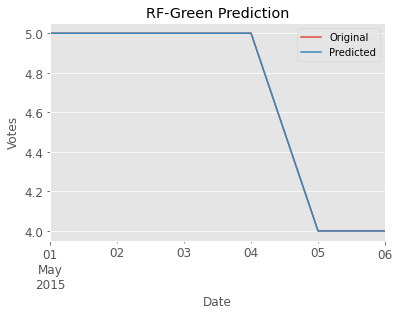

In [8]:
"MODEL PREDICTION"


"One Week Prediction"
# Slice the Data
From = '2012-01-02'
To   = '2015-04-30'
df_Z_train = df.loc[From:To,:]

# Slice the Data
df_test = pd.read_excel("2012_test.xlsx")

df_test['Date'] = pd.to_datetime(df_test['Date'])

df_test.set_index("Date", inplace=True)

df_Z_test = df_test.select_dtypes(exclude=['object', 'datetime']) * 100

party = "Green"

df_Z_train = df_Z_train[[party]]
df_Z_test = df_Z_test[[party]]


regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(df_Z_train, df_Z_train)  

y_preds = regressor.predict(df_Z_test)

#-----------------------------------------------------------------------------------------------------------------
"PERFORMANCE METRICS"

print(f"Mean Absolute Error {party}:", round(metrics.mean_absolute_error(df_Z_test, y_preds), 4))
print(f"Mean Squared Error {party}:", round(metrics.mean_squared_error(df_Z_test, y_preds), 4))
print(f"Root Mean Squared Error {party}:", round(np.sqrt(metrics.mean_squared_error(df_Z_test, y_preds)), 4))
print(f"(R^2) Score {party}:", round(metrics.r2_score(df_Z_test, y_preds), 4))
errors = abs(df_Z_test.values.reshape(-1,1)- y_preds.reshape(-1,1))
mape = 100 * (errors / df_Z_test)
accuracy = 100 - np.mean(mape)
print(f'Accuracy {party}:', round(accuracy, 2)) 
print()
#-----------------------------------------------------------------------------------------------------------------
"PREDICTION PLOT"

dataset_kk = pd.DataFrame({'y_test': [df_Z_test[party].values.reshape(-1,1)], 'y_preds': [y_preds.reshape(-1,1)]})


x = df_Z_test[party].values
y = y_preds
dfedf = pd.DataFrame({'Original':x, 'Predicted':y , "Date":df_Z_test.index.values})
dfedf.set_index("Date", inplace=True)
plt.style.use('ggplot')
ax = dfedf[['Original','Predicted']].plot(kind='line', title =f"{model_work}-{party} Prediction",legend=True, fontsize=12)
ax.set_xlabel("Date",fontsize=12)
ax.set_ylabel("Votes",fontsize=12)
plt.show()



Mean Absolute Error BNP: 0.0
Mean Squared Error BNP: 0.0
Root Mean Squared Error BNP: 0.0
(R^2) Score BNP: 1.0
Accuracy BNP: BNP   NaN
dtype: float64



<ipython-input-9-058eb48b46c8>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(df_Z_train, df_Z_train)


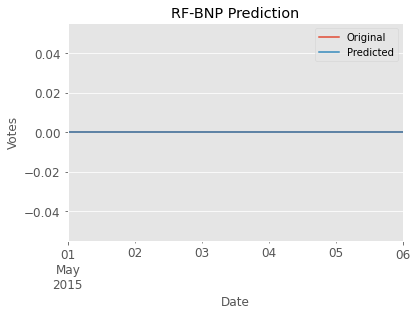

In [9]:
"MODEL PREDICTION"


"One Week Prediction"
# Slice the Data
From = '2012-01-02'
To   = '2015-04-30'
df_Z_train = df.loc[From:To,:]

# Slice the Data
df_test = pd.read_excel("2012_test.xlsx")

df_test['Date'] = pd.to_datetime(df_test['Date'])

df_test.set_index("Date", inplace=True)

df_Z_test = df_test.select_dtypes(exclude=['object', 'datetime']) * 100

party = "BNP"

df_Z_train = df_Z_train[[party]]
df_Z_test = df_Z_test[[party]]


regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(df_Z_train, df_Z_train)  

y_preds = regressor.predict(df_Z_test)

#-----------------------------------------------------------------------------------------------------------------
"PERFORMANCE METRICS"

print(f"Mean Absolute Error {party}:", round(metrics.mean_absolute_error(df_Z_test, y_preds), 4))
print(f"Mean Squared Error {party}:", round(metrics.mean_squared_error(df_Z_test, y_preds), 4))
print(f"Root Mean Squared Error {party}:", round(np.sqrt(metrics.mean_squared_error(df_Z_test, y_preds)), 4))
print(f"(R^2) Score {party}:", round(metrics.r2_score(df_Z_test, y_preds), 4))
errors = abs(df_Z_test.values.reshape(-1,1)- y_preds.reshape(-1,1))
mape = 100 * (errors / df_Z_test)
accuracy = 100 - np.mean(mape)
print(f'Accuracy {party}:', round(accuracy, 2)) 
print()
#-----------------------------------------------------------------------------------------------------------------
"PREDICTION PLOT"

dataset_kk = pd.DataFrame({'y_test': [df_Z_test[party].values.reshape(-1,1)], 'y_preds': [y_preds.reshape(-1,1)]})


x = df_Z_test[party].values
y = y_preds
dfedf = pd.DataFrame({'Original':x, 'Predicted':y , "Date":df_Z_test.index.values})
dfedf.set_index("Date", inplace=True)
plt.style.use('ggplot')
ax = dfedf[['Original','Predicted']].plot(kind='line', title =f"{model_work}-{party} Prediction",legend=True, fontsize=12)
ax.set_xlabel("Date",fontsize=12)
ax.set_ylabel("Votes",fontsize=12)
plt.show()